## Easy

In [1]:
import pandas as pd

df = pd.read_pickle('./train.pickle')
list(df.keys())

['coords', 'labels', 'features', 'sizes']

In [2]:
df['labels']

array([41, 41, 41, ..., 25, 25, 25], dtype=uint8)

In [3]:
X = df['features']
Y = df['labels']
X.shape, Y.shape

((34799, 32, 32, 3), (34799,))

In [4]:
X = X.reshape((34799, 32*32*3))
X.shape

(34799, 3072)

In [5]:
import numpy as np
import random
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, balanced_accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.linear_model import LogisticRegression



In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, Y)

In [7]:
logres = LogisticRegression(max_iter = 100, multi_class = 'multinomial')
logres.fit(x_train, y_train)

C:\Users\ptarh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [8]:
y_pred = logres.predict(x_test)
y_pred.shape, y_test.shape

((8700,), (8700,))

In [9]:
accuracy_score(y_test, y_pred), balanced_accuracy_score(y_test, y_pred)

(0.92, 0.8986464657768114)

In [10]:
m = confusion_matrix(y_test, y_pred)
for i in range(43):
    print(i, m[i])

0 [34 10  1  0  3  1  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
1 [  5 444  13   3  13   7   1   3   5   0   1   0   0   1   0   1   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0]
2 [  1  10 451   5  13   7   0   3   3   1   1   0   0   0   0   5   0   0
   0   4   0   0   0   0   0   0   1   0   1   0   0   3   0   0   0   0
   0   0   0   0   0   0   0]
3 [  0   2   4 289   1  30   3   2   0   3   2   0   0   2   0   2   1   0
   0   0   1   0   0   0   0   0   0   0   0   1   0   0   1   0   0   1
   0   1   0   0   0   0   0]
4 [  0   2   8   2 408   4   0   1   1   0   0   0   0   0   0   4   0   0
   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0]
5 [  1   4   5   8   4 366   2   3   4   0   2   3   0   1   0   1   1   0
   0   0   0   0   0   3   0   3   0   0   0   0   0   1   1   1   0   0
   0  

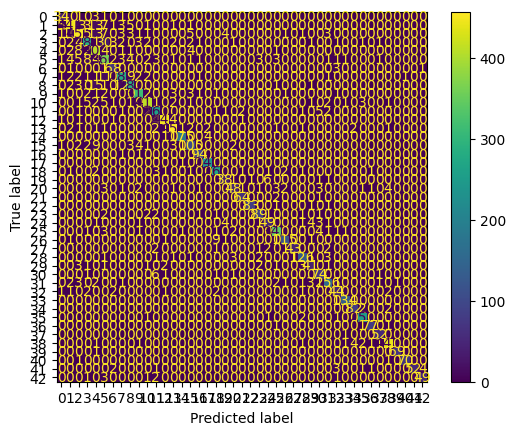

In [11]:
dp = ConfusionMatrixDisplay(m)
dp.plot()
plt.rcParams["figure.figsize"] = (30,30)
plt.show()

In [12]:
labels = pd.read_csv('./label_names.csv')
labels

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


Как и можно было ожидать, больше всего модель путает знаки ограничения скорости (например, потому что различия у большинства из них - это всего лишь одна первая цифра). Матрица ошибок более информативна, чем accuracy_score, хотя и менее удобна. Кроме того, из-за дисбасанса классов нам лучше использовать balanced_accuracy_score вместо обычного. 

## Medium

In [13]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

In [14]:
knn = KNeighborsClassifier()
params = {'n_neighbors':list(range(1, 6))}
clf = GridSearchCV(knn, params)
clf.fit(x_train, y_train)
clf.best_estimator_

KNeighborsClassifier(n_neighbors=1)

In [15]:
y_pred = clf.best_estimator_.predict(x_test)
accuracy_score(y_test, y_pred), balanced_accuracy_score(y_test, y_pred)

(0.9356321839080459, 0.9388300799589946)

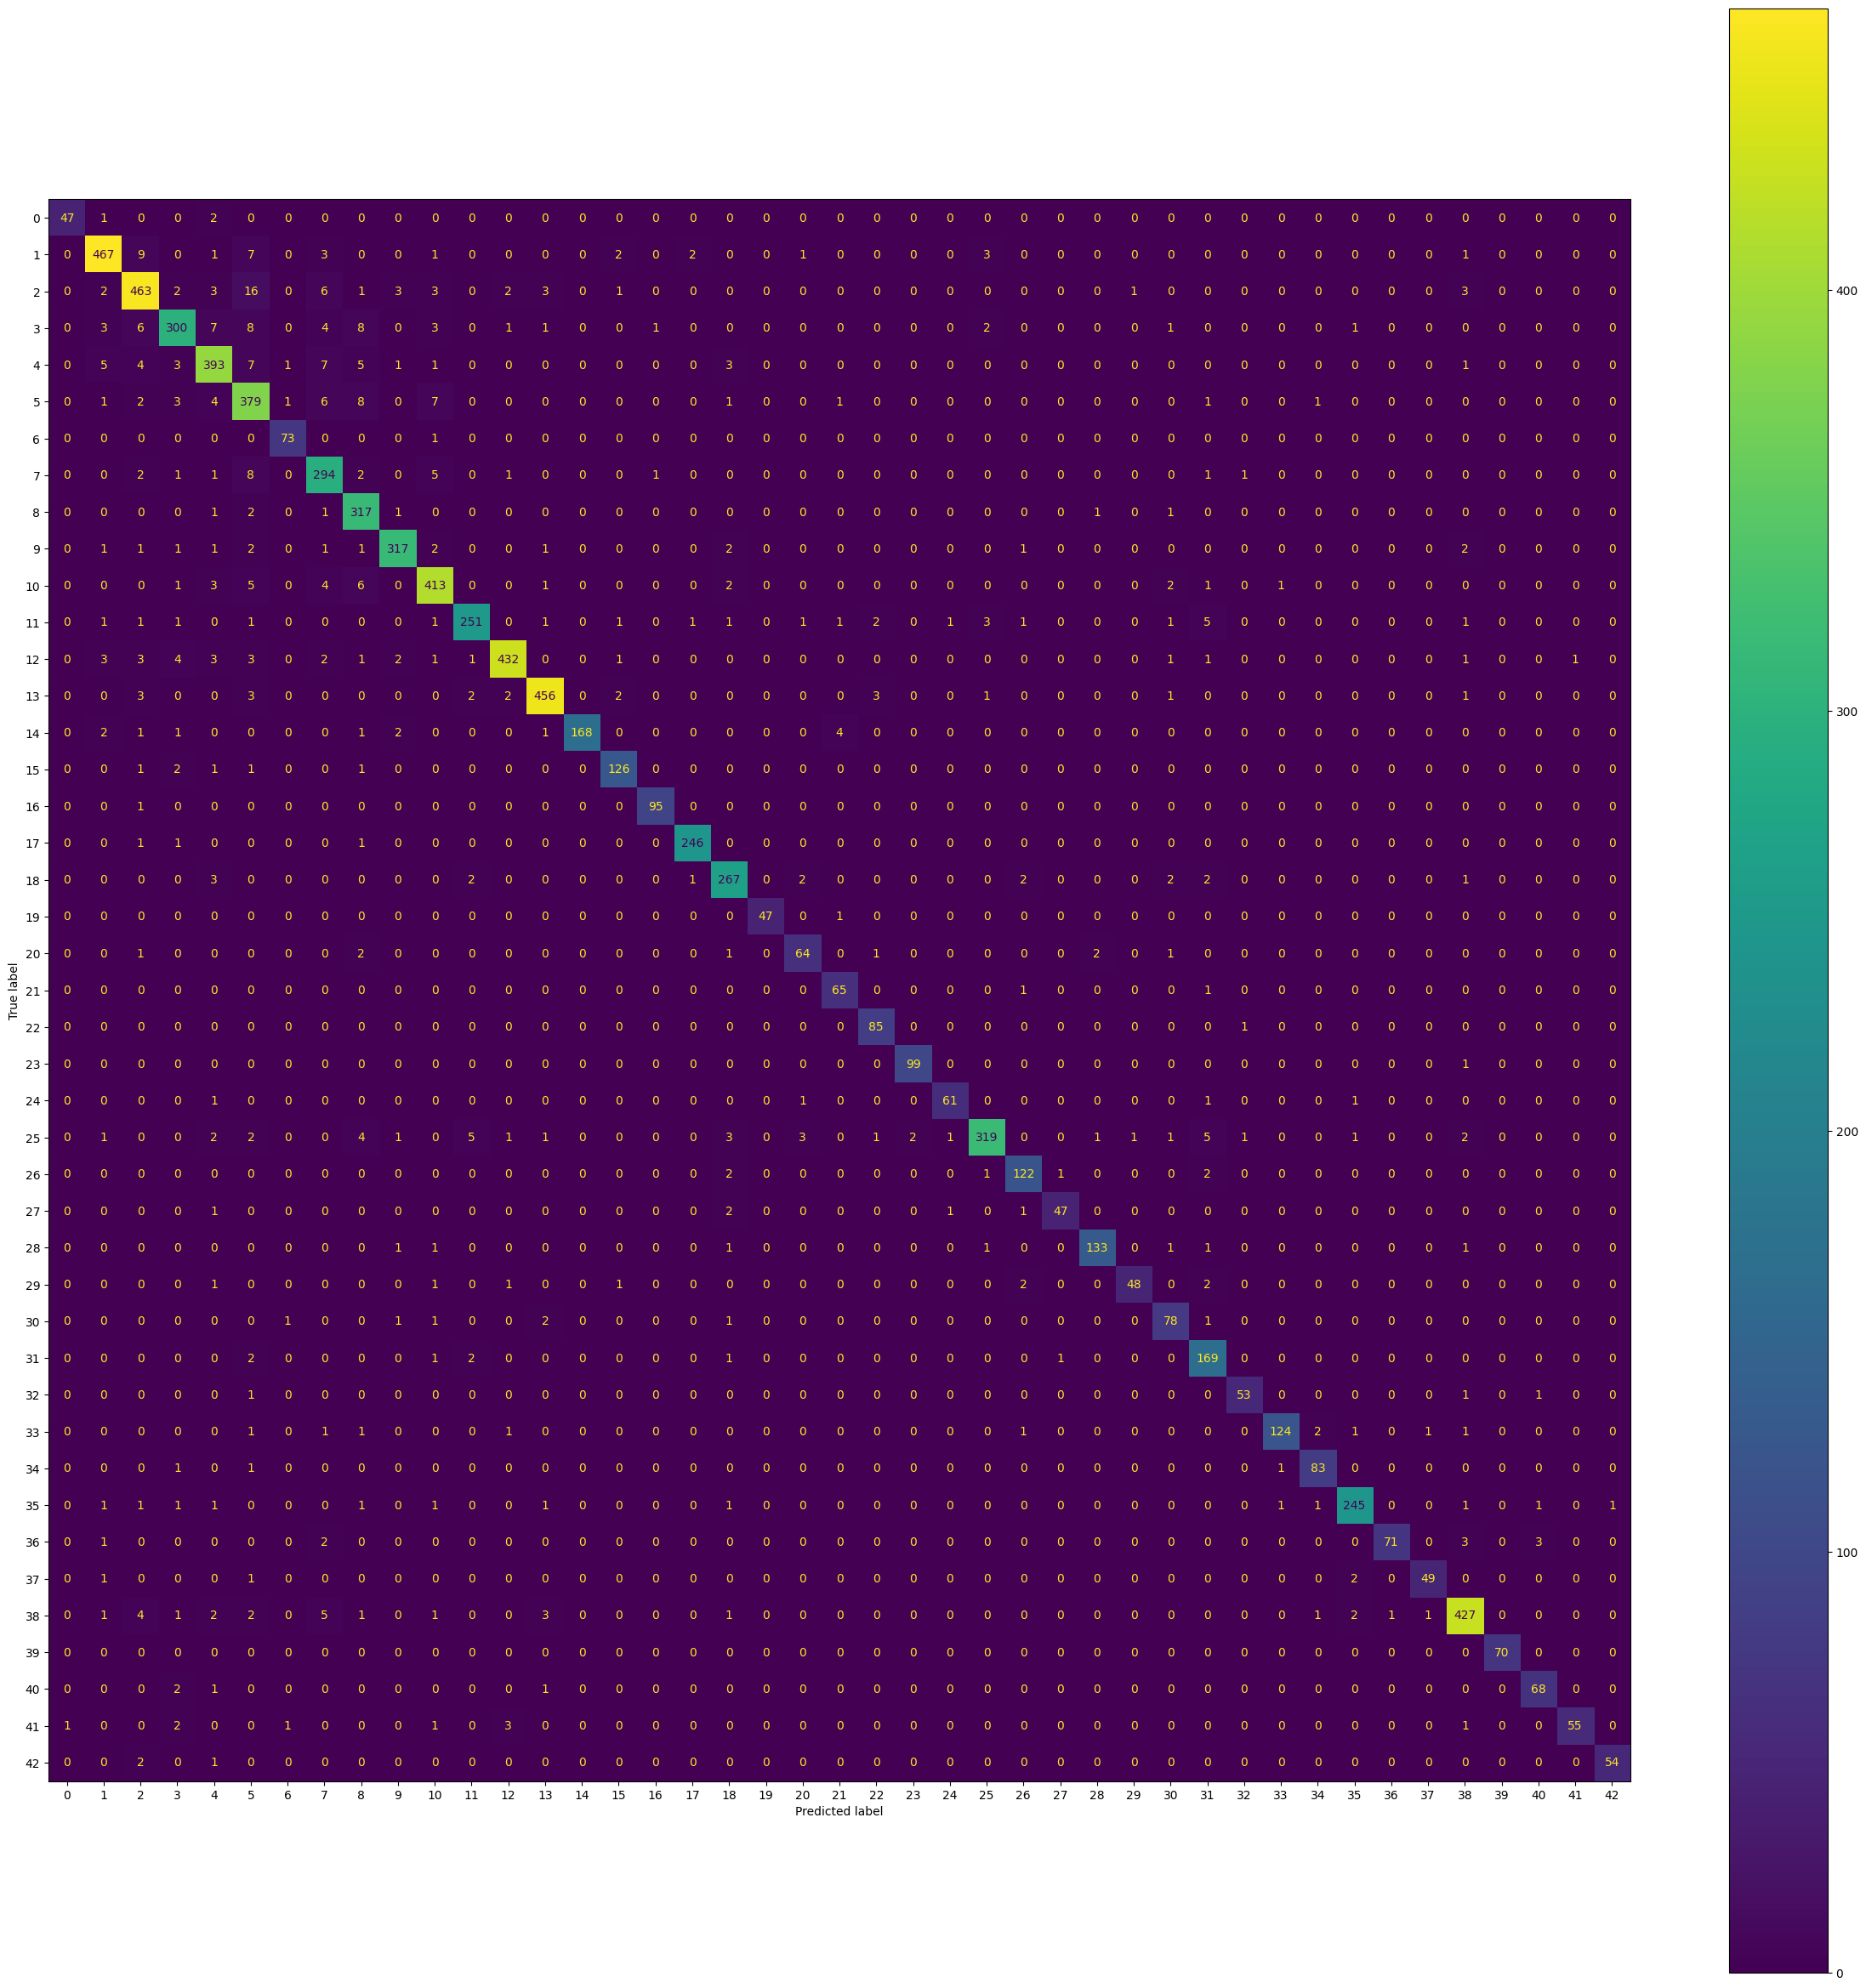

In [16]:
m = confusion_matrix(y_test, y_pred)
dp = ConfusionMatrixDisplay(m)
dp.plot()
plt.rcParams["figure.figsize"] = (30,30)
plt.show()

Ради интереса запустим цикл с разными значениями числа соседей. Из любопытного: чем больше соседей, тем больше ошибка. Вероятно, причина в тех самых знаках ограничения скорости. 

In [17]:
nb = MultinomialNB()
nb.fit(x_train, y_train)
y_pred = nb.predict(x_test)
accuracy_score(y_test, y_pred), balanced_accuracy_score(y_test, y_pred)

(0.325632183908046, 0.34483039879351646)

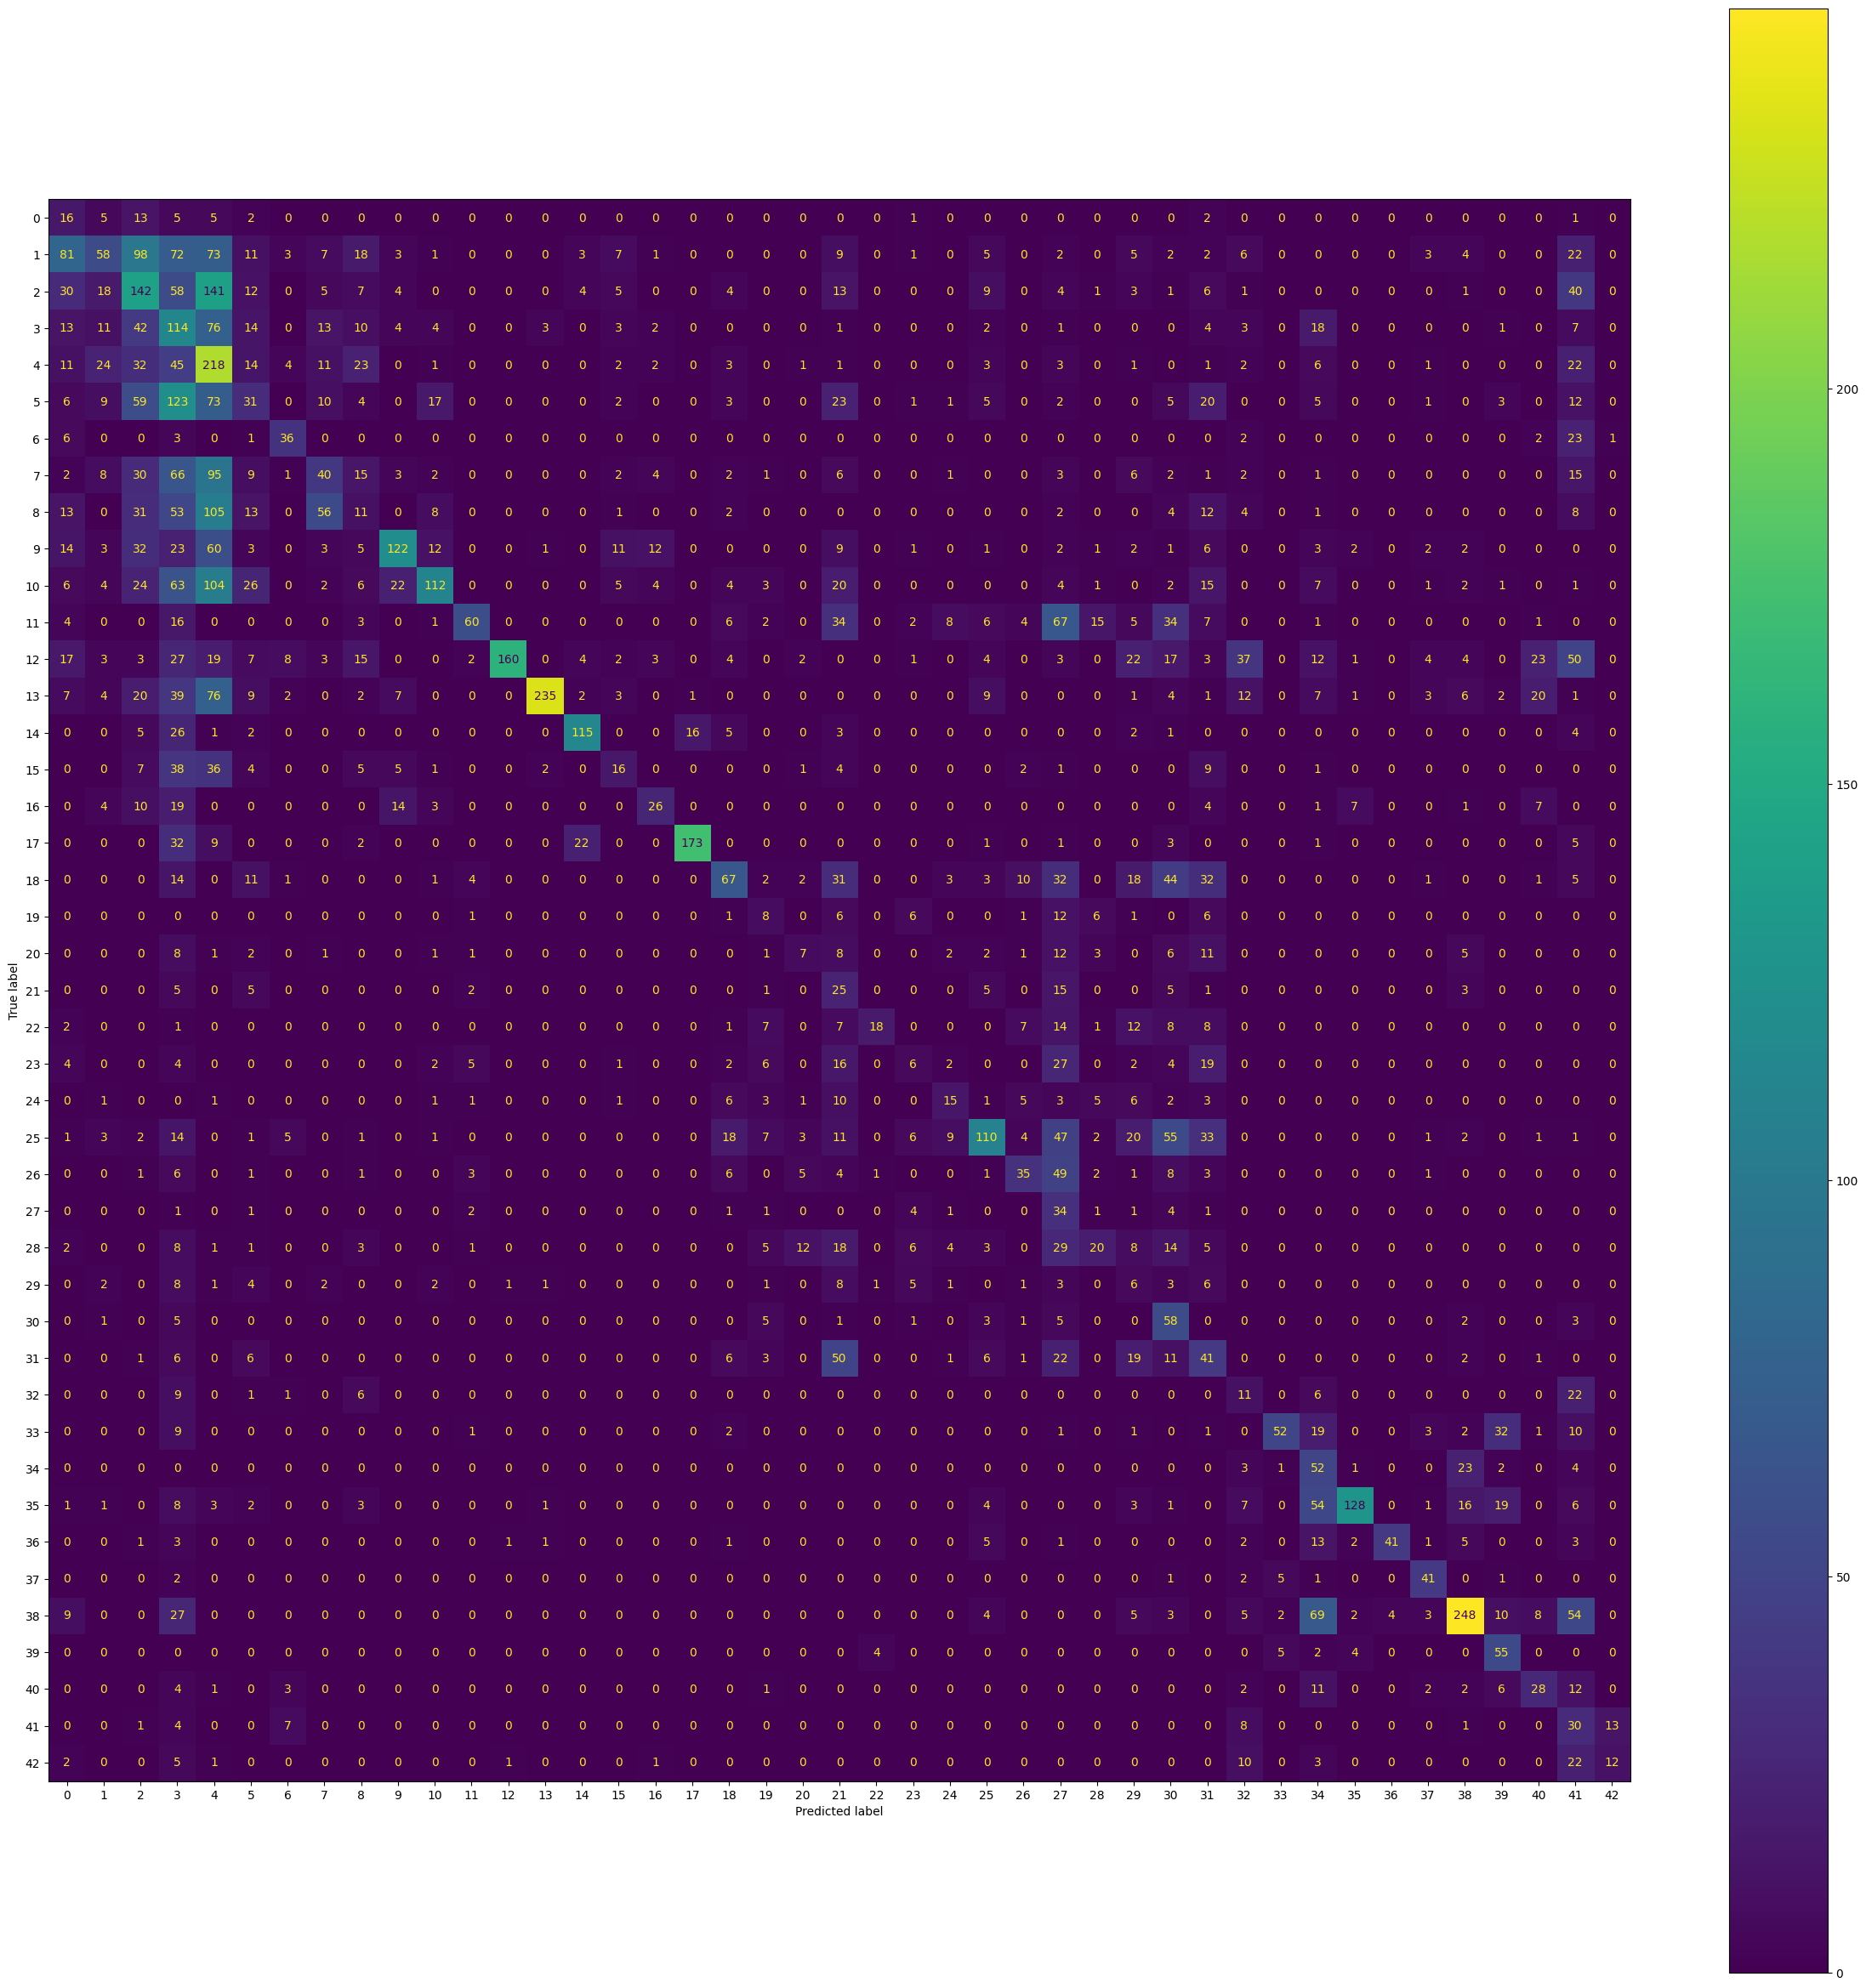

In [18]:
m = confusion_matrix(y_test, y_pred)
dp = ConfusionMatrixDisplay(m)
dp.plot()
plt.rcParams["figure.figsize"] = (30,30)
plt.show()

In [19]:
supvec = SVC(kernel = 'linear')
supvec.fit(x_train, y_train)
y_pred = supvec.predict(x_test)
accuracy_score(y_test, y_pred), balanced_accuracy_score(y_test, y_pred)

(0.9529885057471265, 0.953795067965552)

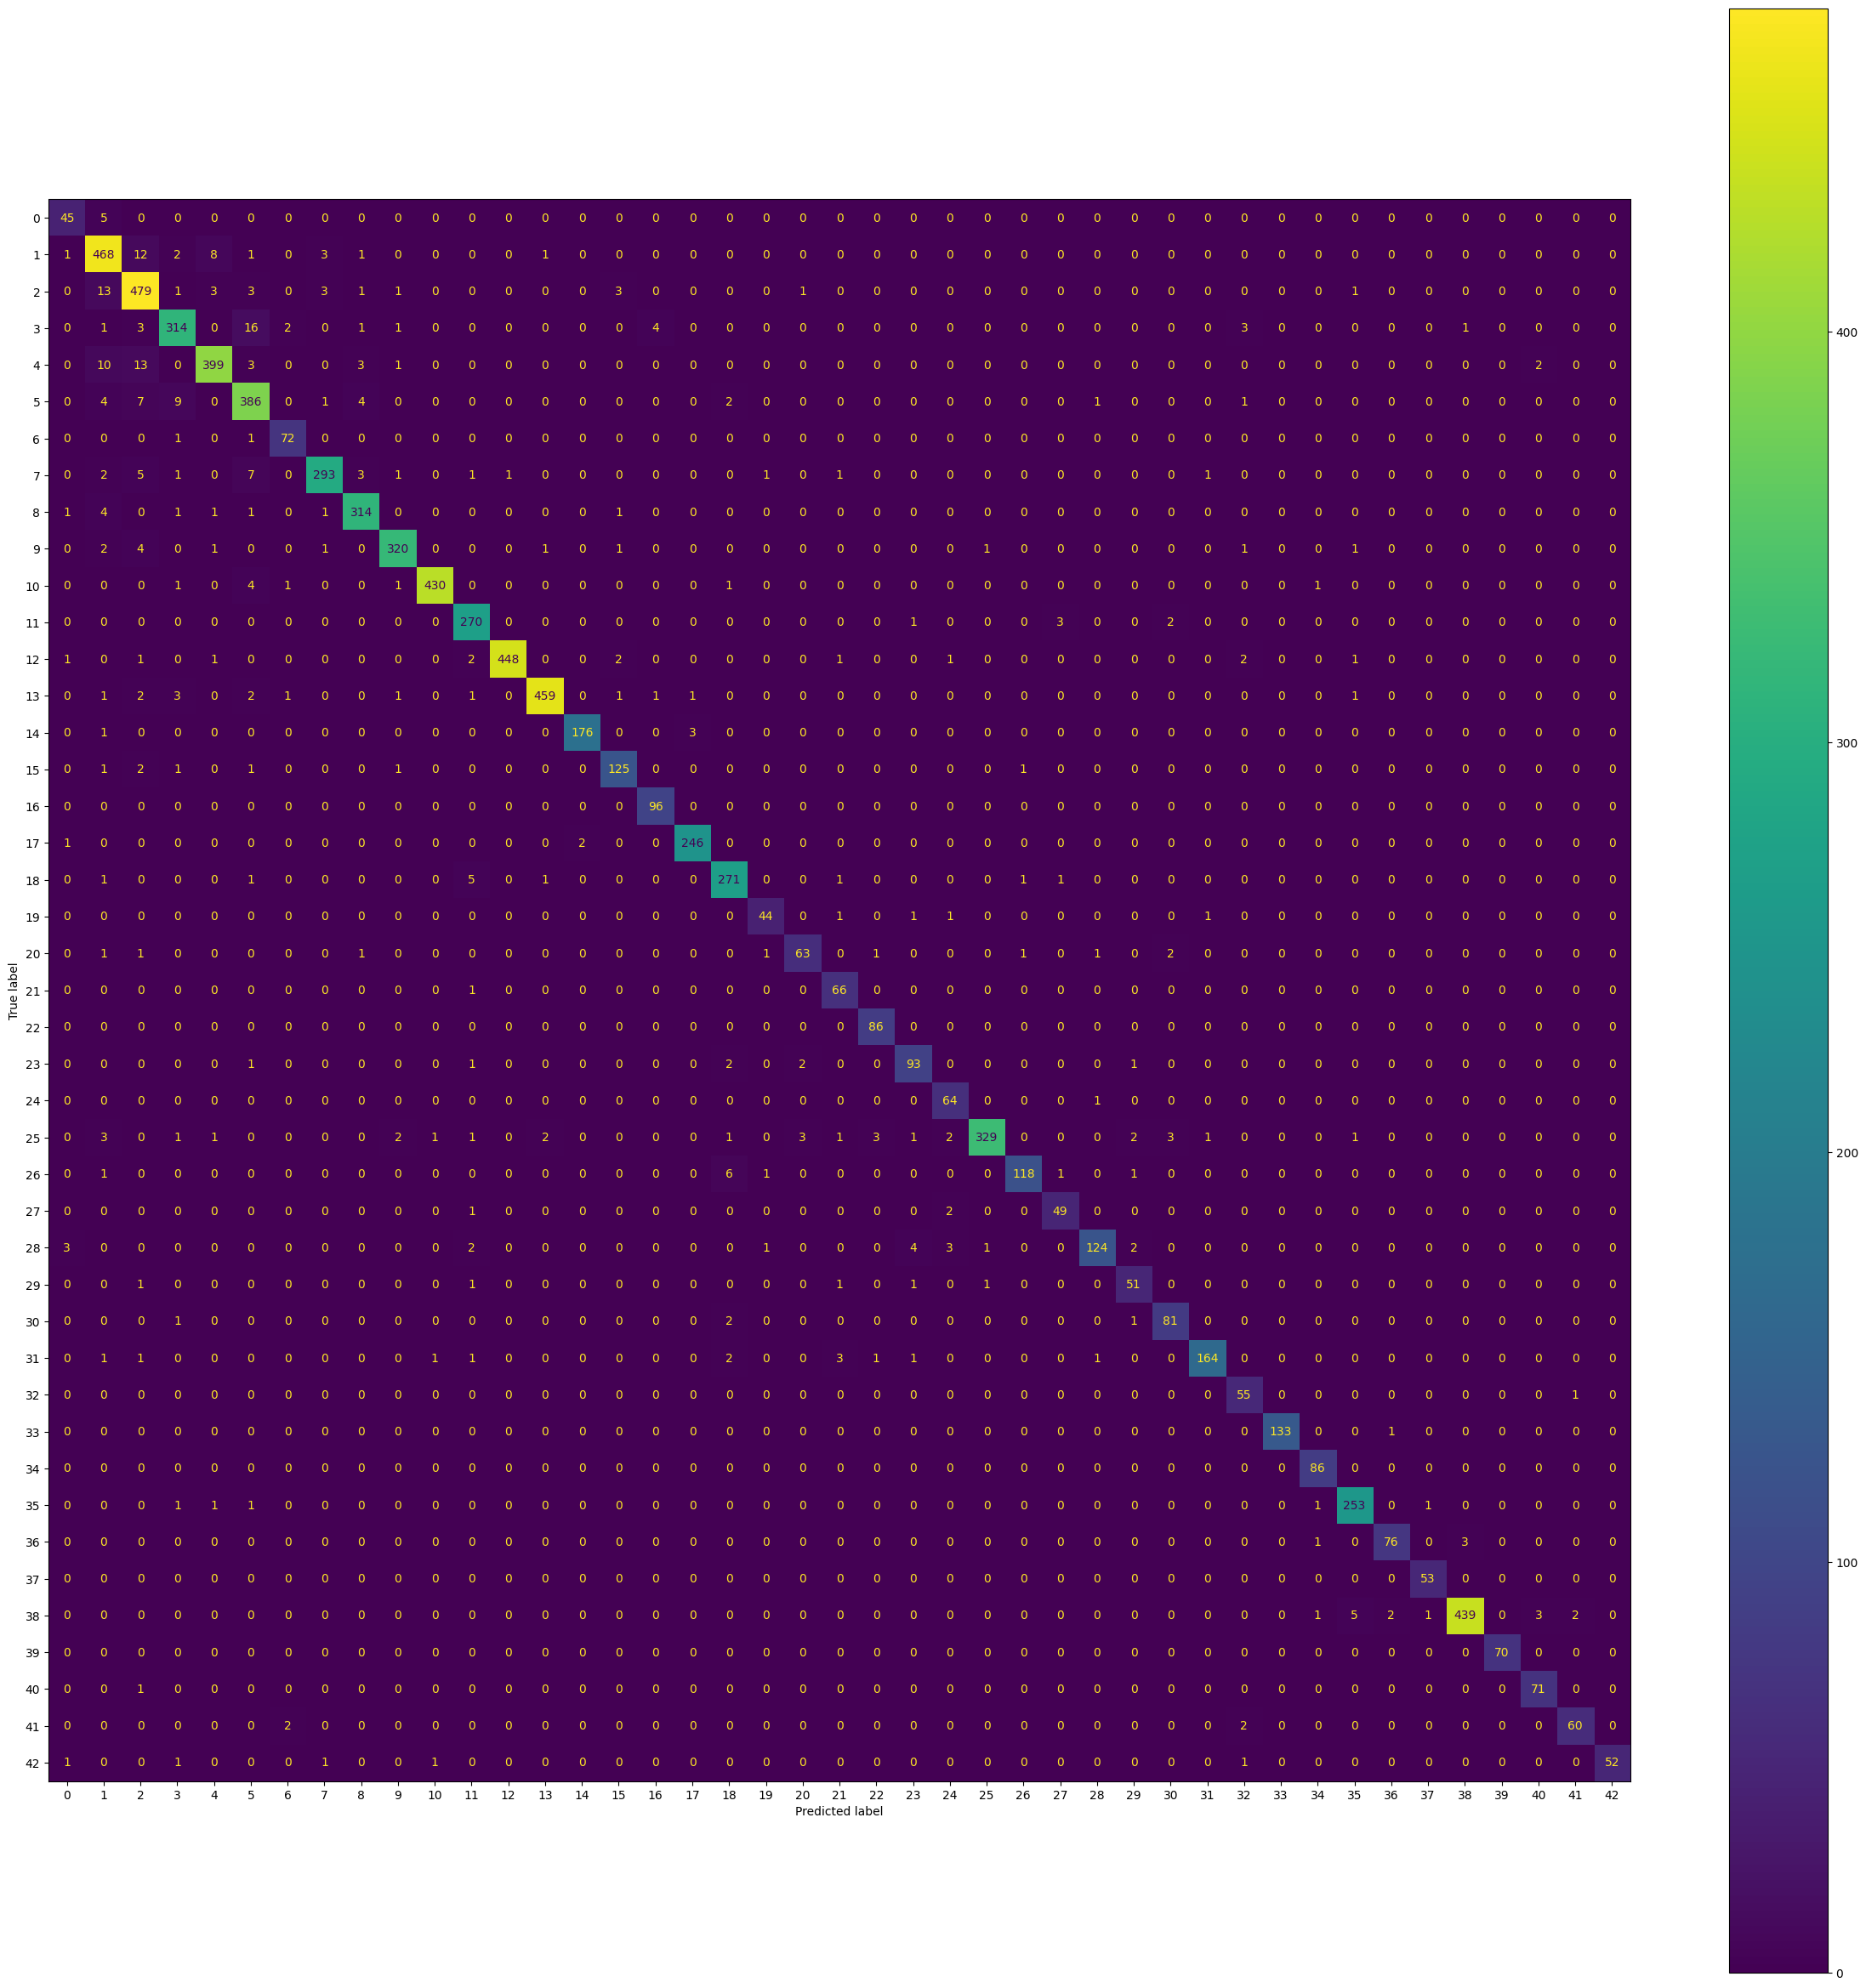

In [20]:
m = confusion_matrix(y_test, y_pred)
dp = ConfusionMatrixDisplay(m)
dp.plot()
plt.rcParams["figure.figsize"] = (30,30)
plt.show()

In [21]:
supvec = SVC(kernel = 'poly')
supvec.fit(x_train, y_train)
y_pred = supvec.predict(x_test)
accuracy_score(y_test, y_pred), balanced_accuracy_score(y_test, y_pred)

(0.7047126436781609, 0.6771124652861371)

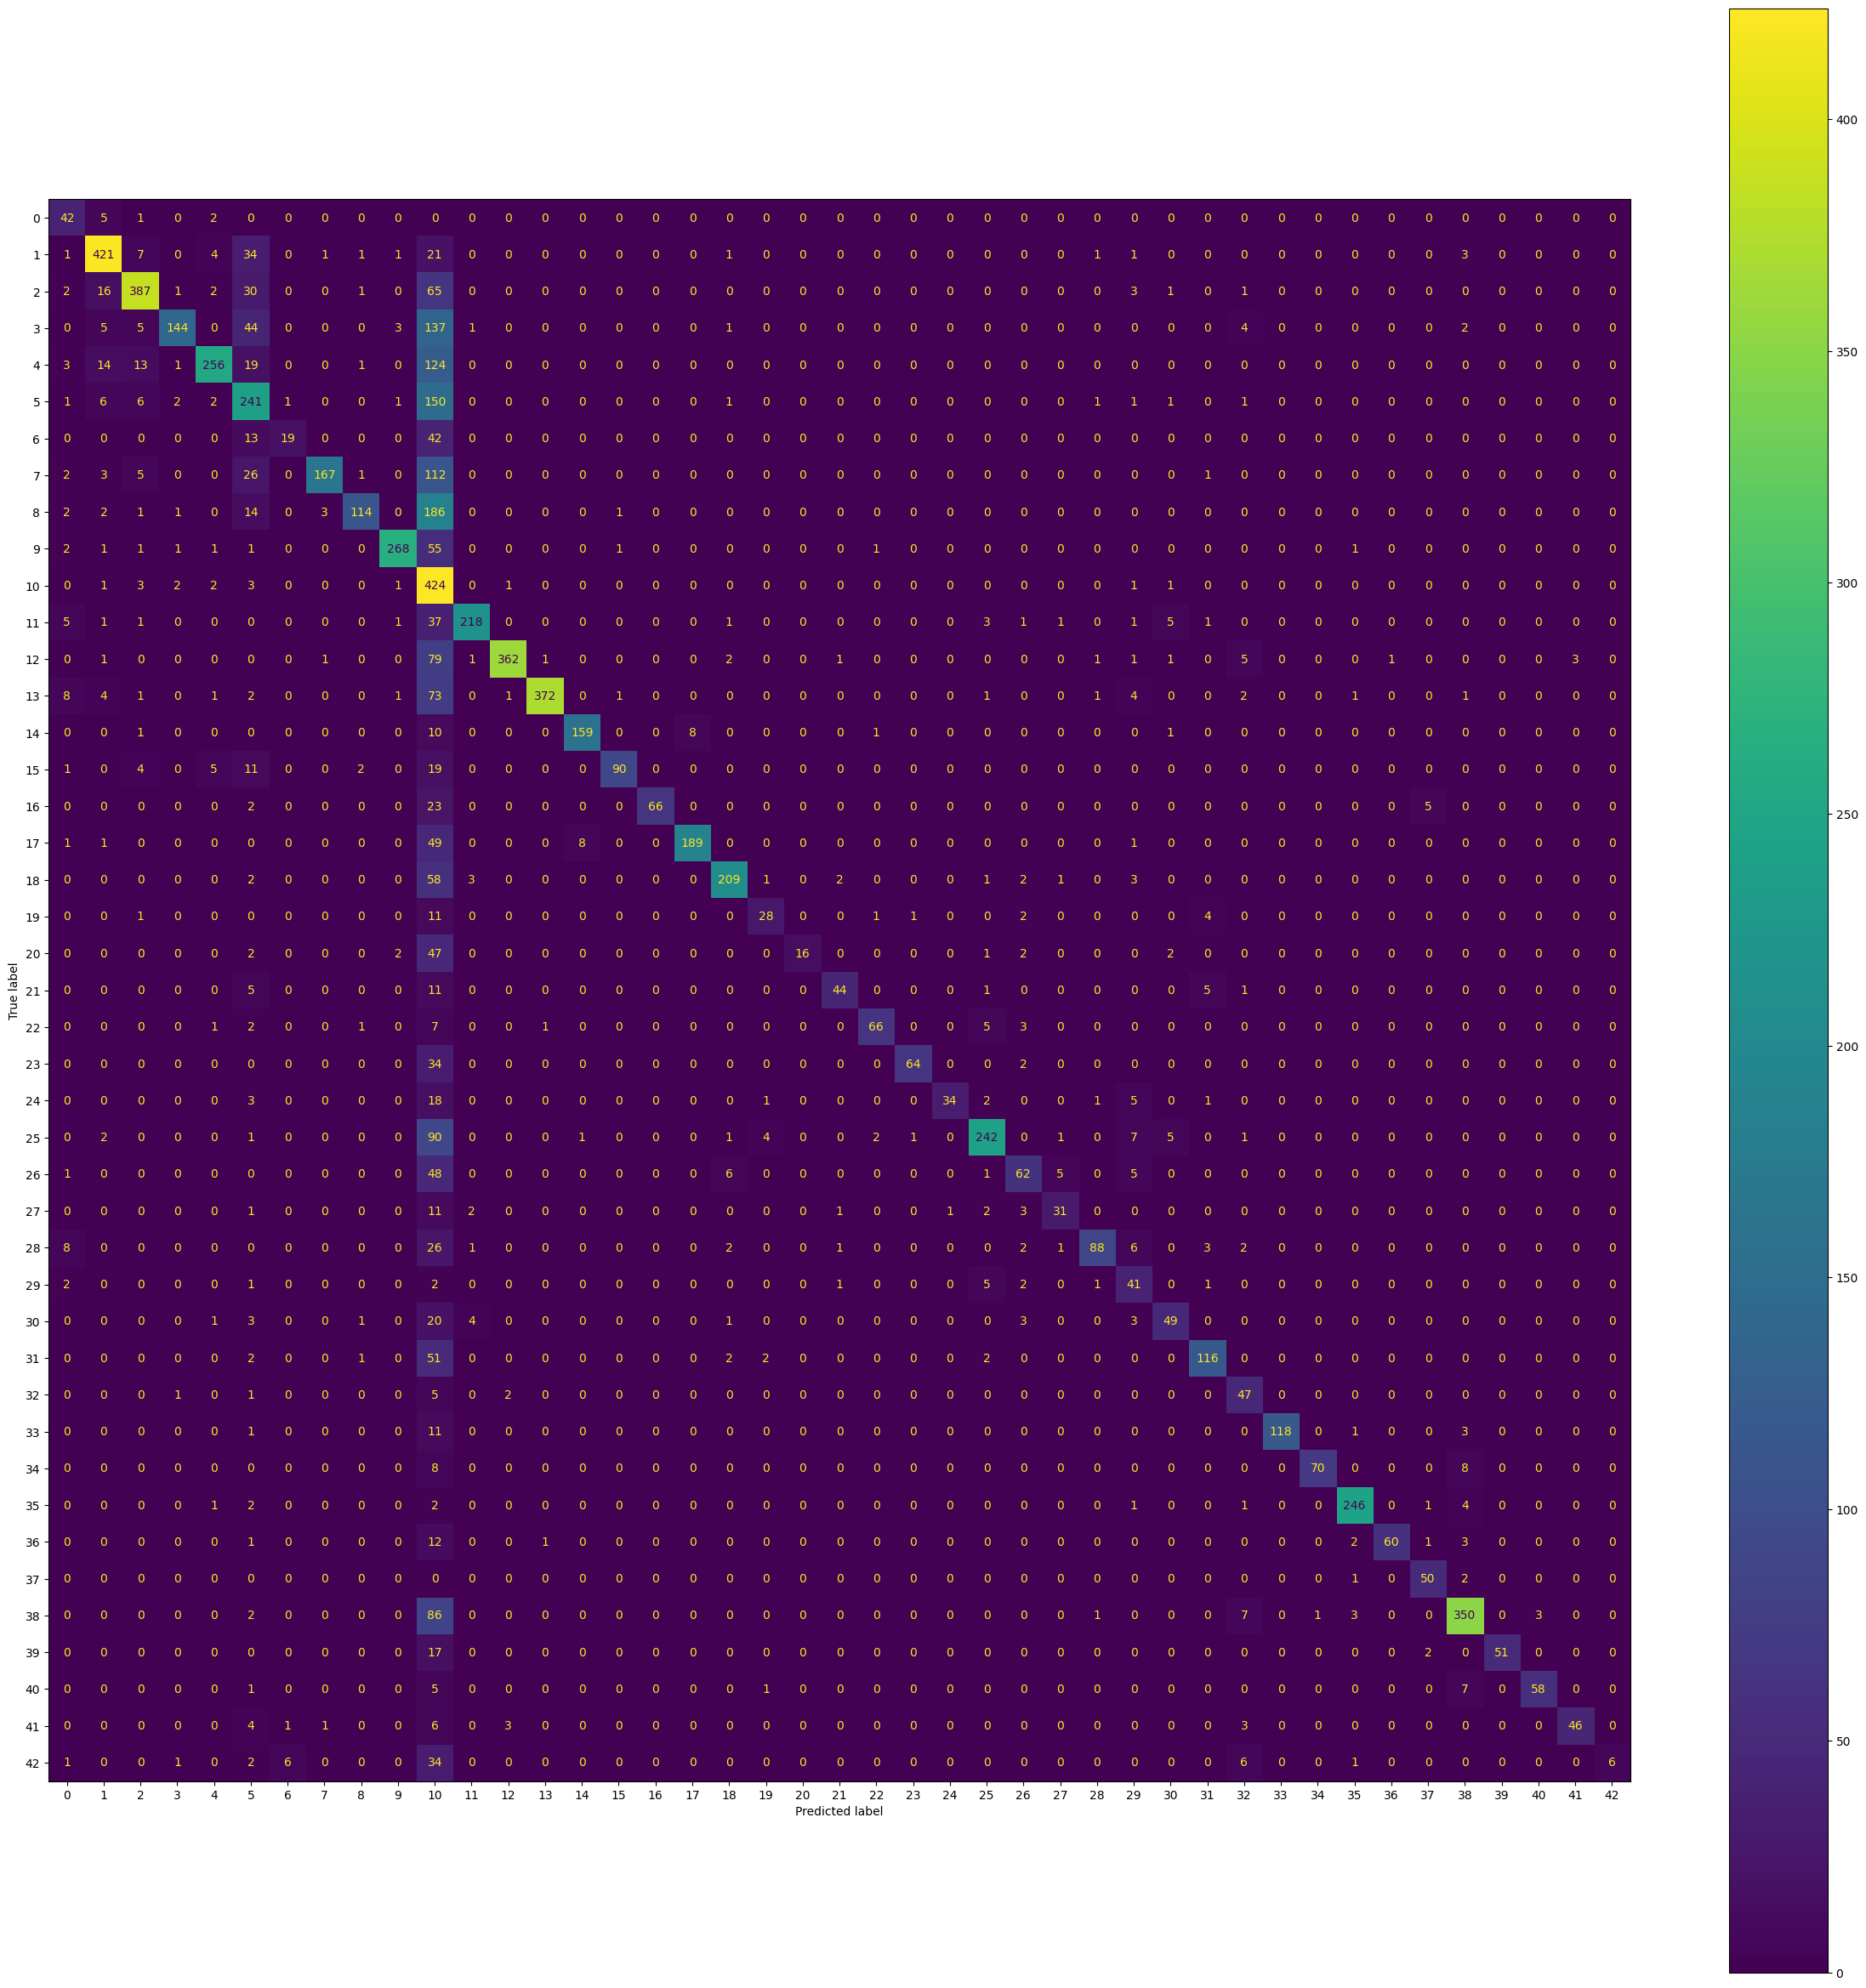

In [22]:
m = confusion_matrix(y_test, y_pred)
dp = ConfusionMatrixDisplay(m)
dp.plot()
plt.rcParams["figure.figsize"] = (30,30)
plt.show()

In [23]:
supvec = SVC(kernel = 'rbf')
supvec.fit(x_train, y_train)
y_pred = supvec.predict(x_test)
accuracy_score(y_test, y_pred), balanced_accuracy_score(y_test, y_pred)

(0.8685057471264368, 0.8231301036834907)

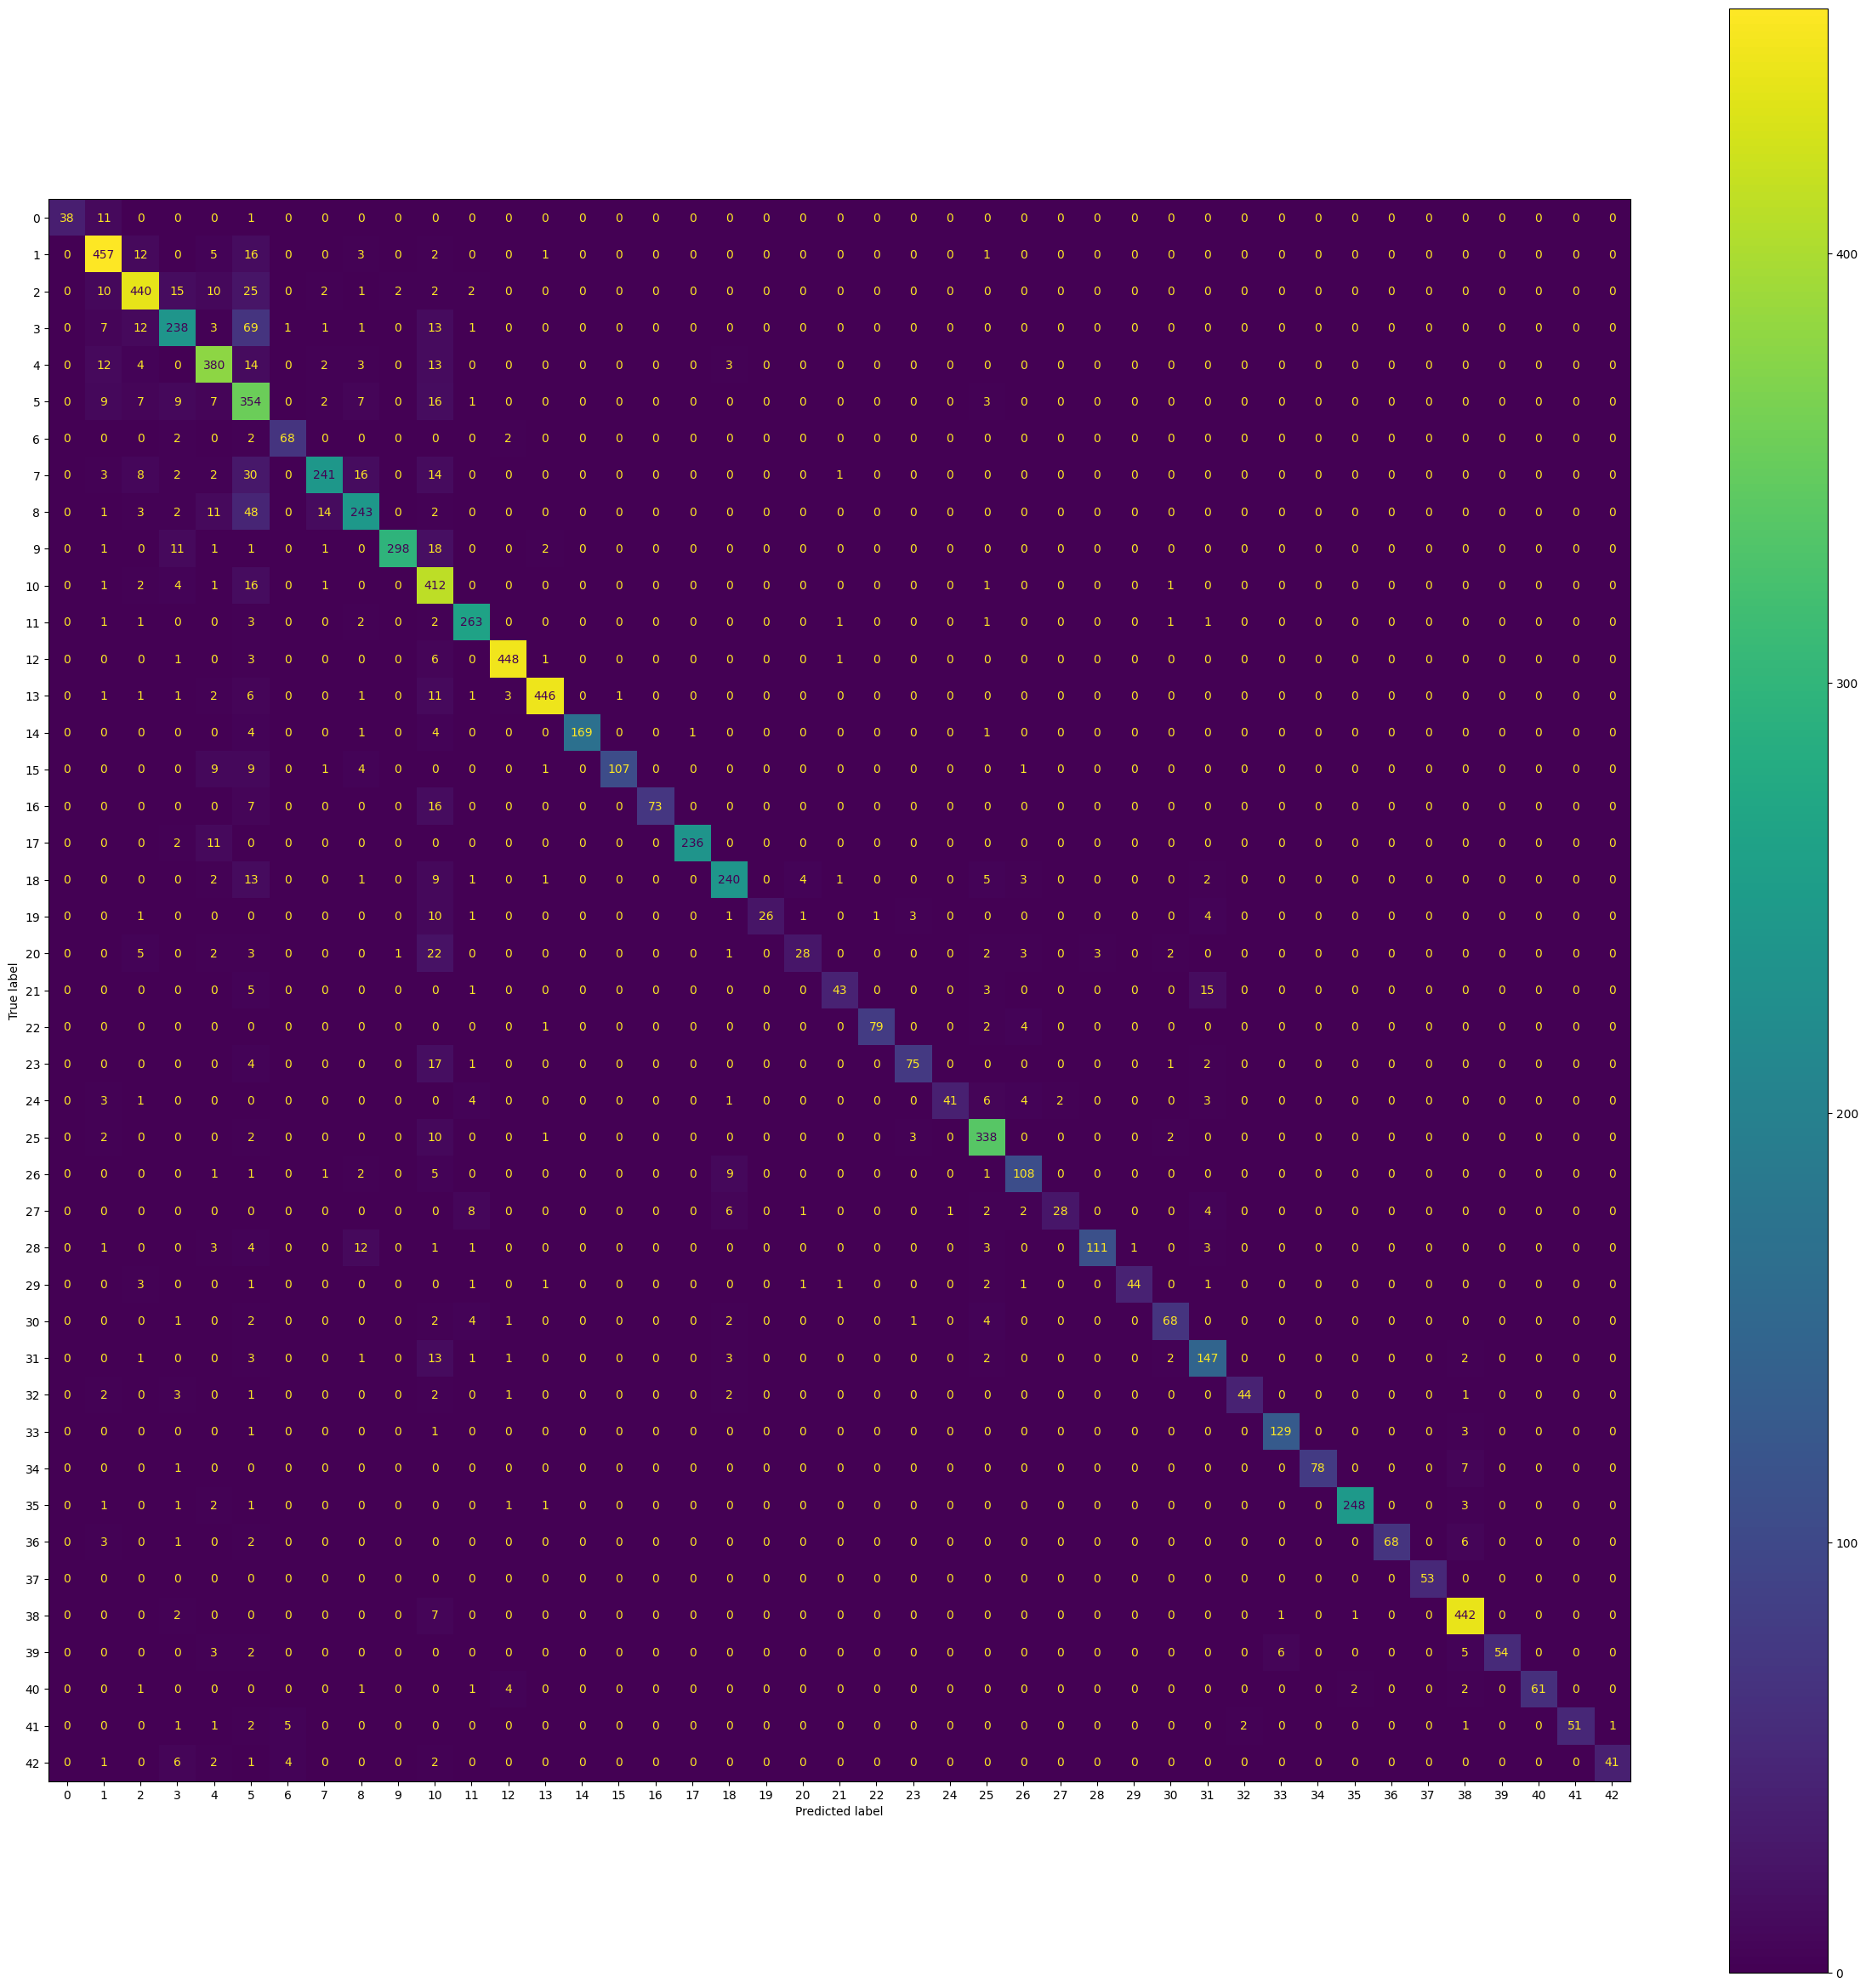

In [24]:
m = confusion_matrix(y_test, y_pred)
dp = ConfusionMatrixDisplay(m)
dp.plot()
plt.rcParams["figure.figsize"] = (30,30)
plt.show()

Выводы: RBF отработал хуже линейного ядра, вероятно, по той причине, что знаки ограничения скорости плохо отличаются друг от друга. Полиномиальное ядро могло банально переобучиться. Как мы еще видели до этого, логистическая регрессия тоже сама по себе неплохо справилась, что говорит о том, что данные, скорее всего, в целом линейны. Наивный баесовский классификатор, вероятно, в принципе не подходит для данной задачи (опять же, есть коллизия классов). Линейное ядро отличается еще и тем, что для нее balanced_accuracy_score почти равен обычному и выше, чем у всех прочих моделей. В его пользу говорит и матрица ошибок, которая почти идеальная. Еще любопытно, что на классе с индексом 10 SCV с rbf и poly ошибается часто (в том смысле, что модели предсказывают его вместо правильных классов). 

## Hard

То, для чего созданы функции в скрипте, называется аугментацией данных. Это удобно и логично. Очевидно, в процессе движения автомобиля положение знака изменяется относительно него, меняется угол поворота и расстояния. Чтобы учесть все эти факторы, на практике очень часто искусственно увеличивают имеющийся датасет как раз путем вращения, отражения и изменения цвета картинок. При желании можно для разметки (и в целом для классификации в дальнейшем) использовать GAN или дофайнтьюнить какую-то CV-модель побольше (например, Inception-v3 или ResNet50 из torchvision). Это относительно быстро и дешево. 

Что касается количества сэмплов, необходимо уравнять доли знаков ограничения скорости и увеличить их в общем объёме. Например, разница в количестве знаков с ограничением в 20км/ч и 30 км/ч - порядка 10-15 раз. Из-за этого на знаках с 20 модель (в процентном отношении) сильно ошибается. 

На практике попробуем сделать аугментацию для знаков в 20км/ч и посмотрим, как с этим справится SVC с линейным ядром (мы конечно не проводили кросс-валидацию, но с учетом достаточно объемного датасета для train и test можно в целом предполагать, что значение accuracy достаточно близко к среднему при кросс-валидации).

In [25]:
counts = []
for i in range(43):
    cnt = 0
    for elem in Y:
        if elem == i:
            cnt += 1
    counts.append(cnt)

<BarContainer object of 43 artists>

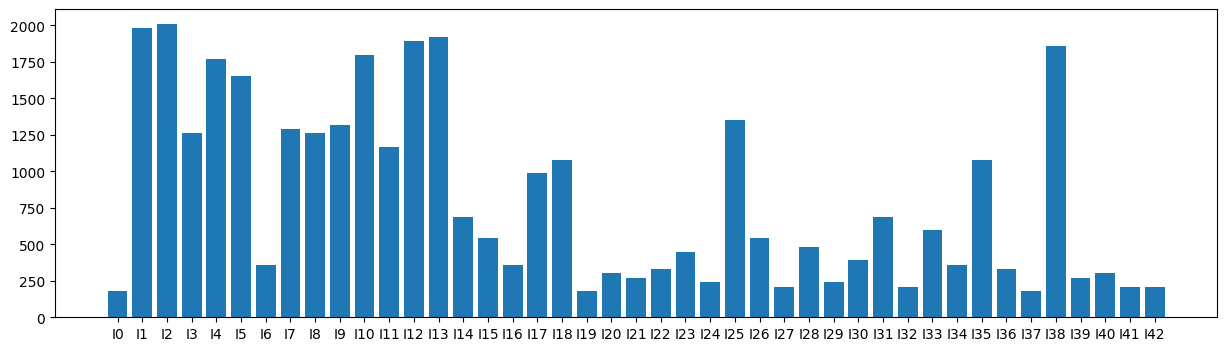

In [26]:
indices = [f"I{i}" for i in range(43)]
plt.rcParams["figure.figsize"] = (15,4)
plt.bar(indices, counts)

Как мы видим, какие-то классы представлены в количестве почти 2000 во всей выборке, а каких-то меньше 250. Я бы предложил применить аугментацию к тем классам, элементы которых, например, представлены в количестве < 500. Параллельно с этим можно ограничить количество самых больших классов, например, 1500. Тогда выборка будет относительно репрезентативной.

Еще попробуем ограничить количество элементов каждого класса числом 1000 и запустить несколько лучших моделей (SVC-linear, logistic regression, knn). Но для этого случая - часть элементов для малочисленных классов мы продублируем, чтобы уравнять количество элементов каждого класса. 

In [27]:
X_fixed, Y_fixed = [], []

In [28]:
cnts = dict()
flag = 1
while flag:
    flag = 0
    for i, elem in enumerate(y_train):
        cnts[elem] = cnts.get(elem, 0) + 1
        if cnts[elem] <= 1000:
            X_fixed.append(x_train[i].tolist())
            Y_fixed.append(elem)
            flag = 1
X_fixed, Y_fixed = np.array(X_fixed), np.array(Y_fixed)

In [29]:
X_fixed.shape, Y_fixed.shape

((43000, 3072), (43000,))

In [30]:
logres = LogisticRegression(max_iter = 100, multi_class = 'multinomial')
logres.fit(X_fixed, Y_fixed)
y_pred = logres.predict(x_test)
accuracy_score(y_test, y_pred), balanced_accuracy_score(y_test, y_pred)

C:\Users\ptarh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.9242528735632184, 0.9316826327311184)

Для регрессии мы видим, что результат стал значительно лучше

In [31]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_fixed, Y_fixed)
y_pred = knn.predict(x_test)
accuracy_score(y_test, y_pred), balanced_accuracy_score(y_test, y_pred)

(0.9259770114942528, 0.9356354982773433)

In [32]:
supvec = SVC(kernel = 'linear')
supvec.fit(X_fixed, Y_fixed)
y_pred = supvec.predict(x_test)
accuracy_score(y_test, y_pred), balanced_accuracy_score(y_test, y_pred)

(0.9477011494252874, 0.9506204611708777)

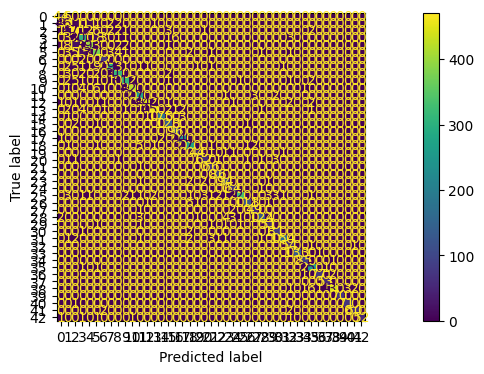

In [33]:
m = confusion_matrix(y_test, y_pred)
dp = ConfusionMatrixDisplay(m)
dp.plot()
plt.rcParams["figure.figsize"] = (30,30)
plt.show()

Выводы: очень хочется, чтобы элементов каждого класса было хотя бы 700 (в нашем случае мы использовали значение 1000). Посчитаем, сколько сэмплов нам еще надо

In [34]:
defic = 0

for elem in counts:
    if 700 - elem > 0:
        defic += 700 - elem
defic

9081

Итого нам надо 9081 записей. Предположим, разметка одной записи стоит 0.5 рубля и делается вручную, тогда нам нужно примерно 4 с половиной тыс. руб.